<a href="https://colab.research.google.com/github/IgnisMiso/Home-Task/blob/main/Student_Time_Management_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Time Management Dataset Wrangling

## Import section

In [ ]:
import pandas as pd
from matplotlib import pyplot
import statistics
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  # Import stats module

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.2 MB/s eta 0:00:00


In [ ]:
import pingouin as pg

## Data import section

In [ ]:
data = pd.read_csv('dataset.csv')

In [ ]:
data.head()

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,Disagree,...,Strong Agree,Neither,Agree,Neither,Disagree,Strong Disagree,Strong Agree,Neither,Disagree,Agree
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,...,Neither,Disagree,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,Disagree,...,Agree,Disagree,Agree,Agree,Disagree,Strong Disagree,Disagree,Strong Agree,Strong Agree,Disagree
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,...,Agree,Agree,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Neither,...,Neither,Neither,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree


In [ ]:
data.columns

Index(['Number', 'Age', 'Gender', 'Nationality', 'Program', 'Course',
       'English', 'Academic', 'Attendance', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17'],
      dtype='object')

## Cleaning and Preparation

### Convert object data to numeric data
We use dictionaries as key variables for filtering data we encounter. For Questions (answer scores), Academic performance (%) and Student Attendance, different keys are used, in different dictionaries. A function 'filter_string' is defined, to filter row data with convenience.

In [ ]:
scores = {
    'Strong Agree': 1,
    'Agree': 2,
    'Neither': 3,
    'Disagree': 4,
    'Strong Disagree': 5
}
"""keys for scores"""

academic = {
    '60%~70%': 65,
    '<40%': 40,
    '40%~49%': 45,
    '50%~59%': 55,
    '>70%': 70
}
"""keys for academic performance"""

attendance = {
    'S0': 0,
    'S1': 25,
    'S2': 50,
    'S3': 75,
    'S4': 100
}
"""keys for attendance"""

'keys for attendance'

In [ ]:
def filter_string(value, dictionary: dict, default=0) -> bool:
    """Returns a value from the dictionary under the key of 'value' if present
    in dictionary, a 0 if 'value' is NaN or 'value' if nothing is found, and
    'value' is not NaN"""
    new_value = dictionary.get(value, None)
    if isinstance(new_value, int):
        return new_value
    if pd.isnull(value):
        # pandas checking whether the value is of NaN type
        # if is NaN, just return 0
        return default
    return value

These columns are used for representation purposes only

In [ ]:
columns = ['Number', 'Age', 'Gender', 'Nationality', 'Program', 'Course', 'English', 'Academic', 'Attendance']
"""Pretty columns apart from questions (convenience)"""

'Pretty columns apart from questions (convenience)'

This list defines a list of question columns

In [ ]:
questions = ['6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']
"""All columns for questions"""

'All columns for questions'

Processing data column by column to form a new dataframe

In [ ]:
new_data = dict()
# We're using filter_string for preprocessing data
for column in data.columns:
    if column == 'Academic':
        new_data[column] = [filter_string(value, academic) for value in data[column].tolist()]
    elif column == 'Attendance':
        new_data[column] = [filter_string(value, attendance) for value in data[column].tolist()]
    elif column in questions:
        new_data[column] = [filter_string(value, scores) for value in data[column].tolist()]
    else:
        # the rest is untouched
        new_data[column] = data[column].tolist()

Creating a column for Time Management scores by calculating mean of answer scores

In [ ]:
answer_scores_mean_column = []
# new column for Time Management Score

for index, row in data.iterrows():
    # calculating mean
    answer_scores = []
    for question in questions:
        our_score = filter_string(row[question], scores)
        if not pd.isnull(our_score):
            answer_scores.append(our_score)
        else:
            answer_scores.append(0)
    answer_scores_mean = statistics.mean(answer_scores)
    # our mean is appended to our column
    answer_scores_mean_column.append(answer_scores_mean)

In [ ]:
new_data['Time Management Score'] = answer_scores_mean_column
# putting column into data

Representation time

In [ ]:
# clean data
new_data = pd.DataFrame(new_data)

In [ ]:
new_data[columns]

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,0,0
1,2,26-30,M,China,PM,Science and engineering,60%~70%,55,75
2,3,26-30,M,Kenya,PM,Business,60%~70%,0,0
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,65,0
4,5,21-25,M,China,PM,Business,60%~70%,55,25
...,...,...,...,...,...,...,...,...,...
120,121,21-25,M,China,PM,Business,60%~70%,55,25
121,122,31-35,F,China,PM,Business,50%~59%,55,25
122,123,26-30,M,Gongo,PM,Business,>70%,65,0
123,124,21-25,F,Ukraine,PM,Business,60%~70%,65,25


In [ ]:
table_cols = ['Number', 'Academic', 'Attendance']
table_cols.extend(questions)
table_cols.append('Time Management Score')
new_data[table_cols]

,Number,Academic,Attendance,6,7,8,9,10,11,12,13,14,15,16,17,Time Management Score
0,1,0,0,4,2,1,3,2,3,4,5,1,3,4,2,2.833333
1,2,55,75,1,2,3,4,2,3,4,5,3,2,3,4,3.000000
2,3,0,0,4,1,2,4,2,2,4,5,4,1,1,4,2.833333
3,4,65,0,4,4,2,2,4,2,3,3,3,3,4,2,3.000000
4,5,55,25,3,4,3,3,4,3,3,3,3,4,3,2,3.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,55,25,4,4,2,3,4,4,3,4,4,2,3,2,3.250000
121,122,55,25,2,4,3,2,3,1,2,2,4,2,1,2,2.333333
122,123,65,0,5,3,3,3,3,3,3,5,4,1,4,3,3.333333
123,124,65,25,2,4,4,1,4,2,2,5,4,1,4,4,3.083333


Here, we assign a time management group for each entry, judging by the score. A function 'assign_tmg' is defined, to do exactly that

In [ ]:
tms = new_data['Time Management Score']

In [ ]:
def assign_tmg(score: float) -> int:
    if score <= 3:
        return 0
    return 1

tmg = [assign_tmg(score) for score in tms]

In [ ]:
new_data['Time Management Group'] = tmg

Representation time again

In [ ]:
table_cols = ['Number', 'Academic', 'Attendance']
table_cols.extend(questions)
table_cols.append('Time Management Score')
table_cols.append('Time Management Group')
new_data[table_cols]

,Number,Academic,Attendance,6,7,8,9,10,11,12,13,14,15,16,17,Time Management Score,Time Management Group
0,1,0,0,4,2,1,3,2,3,4,5,1,3,4,2,2.833333,0
1,2,55,75,1,2,3,4,2,3,4,5,3,2,3,4,3.000000,0
2,3,0,0,4,1,2,4,2,2,4,5,4,1,1,4,2.833333,0
3,4,65,0,4,4,2,2,4,2,3,3,3,3,4,2,3.000000,0
4,5,55,25,3,4,3,3,4,3,3,3,3,4,3,2,3.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,55,25,4,4,2,3,4,4,3,4,4,2,3,2,3.250000,1
121,122,55,25,2,4,3,2,3,1,2,2,4,2,1,2,2.333333,0
122,123,65,0,5,3,3,3,3,3,3,5,4,1,4,3,3.333333,1
123,124,65,25,2,4,4,1,4,2,2,5,4,1,4,4,3.083333,1


Checking the balance of classes here

In [ ]:
print('Bad Time Management: {}'.format(len([value for value in new_data['Time Management Group'] if value == 0])))
print('Good Time Management: {}'.format(len([value for value in new_data['Time Management Group'] if value == 1])))

Bad Time Management: 76
Good Time Management: 49


## Description

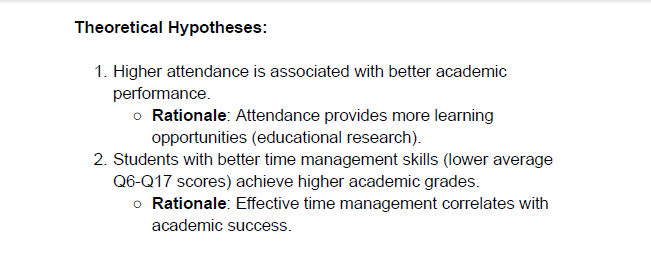

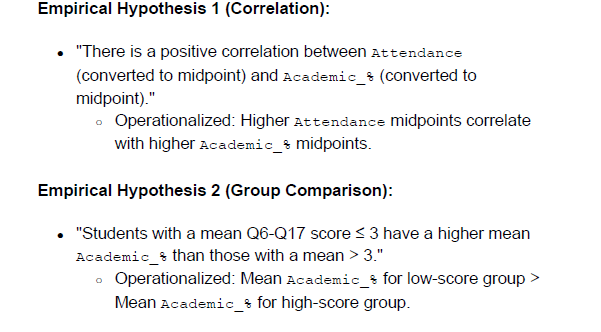

In [ ]:
desc_H1 = new_data[['Attendance', 'Academic']].describe()

### Hypothesis 1

Overall distribution description for Attendance and Academic

In [ ]:
desc_H1

,Attendance,Academic
count,125.000000,125.000000
mean,19.600000,49.280000
std,26.862854,23.951429
min,0.000000,0.000000
25%,0.000000,45.000000
50%,0.000000,55.000000
75%,25.000000,65.000000
max,100.000000,70.000000


This histogram shows the distribution of values in Academic and Attendance column, picturing the balance of values in each column. Specifically, it shows that Attendance distribution is 'left-oriented', while Academic Performance is 'right oriented', which indicates average values for each column

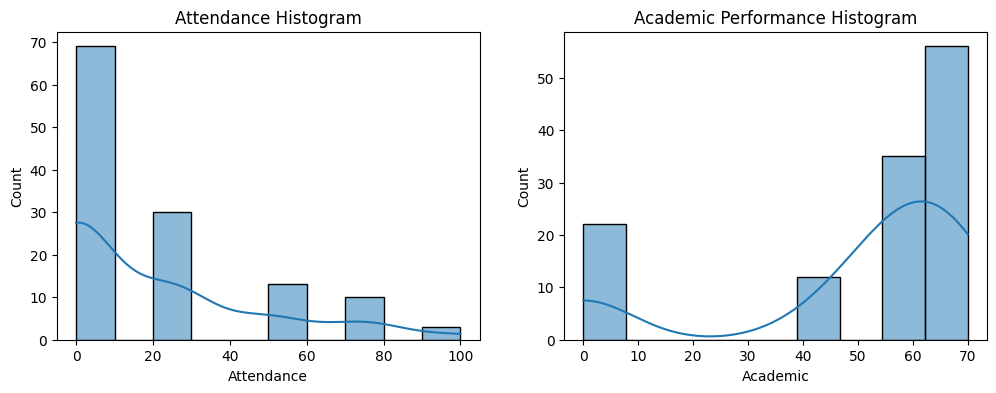

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(new_data['Attendance'], kde=True)
plt.title('Attendance Histogram')
plt.subplot(1, 2, 2)
sns.histplot(new_data['Academic'], kde=True)
plt.title('Academic Performance Histogram')
plt.show()

Judging by the regression line and area, the overall trend of Attendance on the scatterplot is top-right, there is evidence that Academic Performance value is increasing with Attendance

Text(0.5, 1.0, 'Attendance vs Academic Performance')

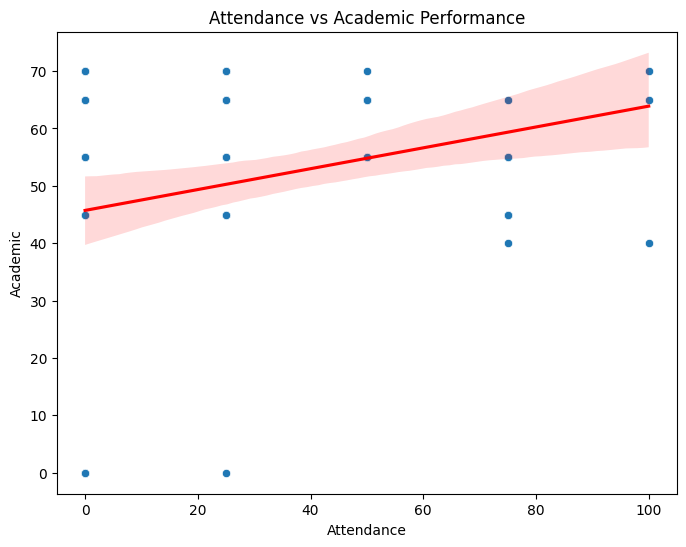

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance', y='Academic', data=new_data)
sns.regplot(x='Attendance', y='Academic', data=new_data, scatter=False, color='red')
plt.title('Attendance vs Academic Performance')

QQ plots suggest the same, for while the distribution of values is different, the overall trend for increasing is present in both distributions

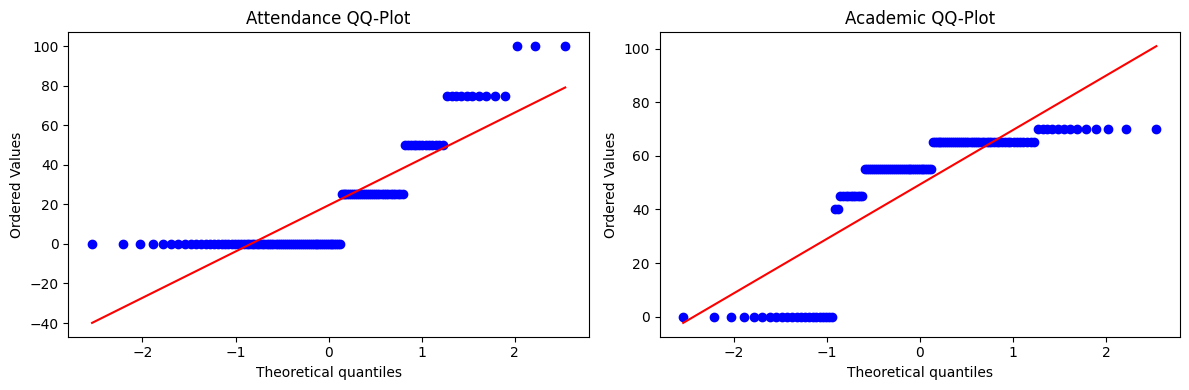

In [ ]:
# Assuming 'data' is a pandas DataFrame with 'Attendance' and 'Academic_%' columns

plt.figure(figsize=(12, 4))

# Plot QQ-plot for 'Attendance'
plt.subplot(1, 2, 1)
stats.probplot(new_data['Attendance'], dist="norm", plot=plt)  # Use stats.probplot
plt.title('Attendance QQ-Plot')

# Plot QQ-plot for 'Academic_%'
plt.subplot(1, 2, 2)
stats.probplot(new_data['Academic'], dist="norm", plot=plt)  # Use stats.probplot
plt.title('Academic  QQ-Plot')

plt.tight_layout()  # Adjust subplot parameters for a tight layout.  Crucial for readability!
plt.show()

Let's check the first hypothesis by using Pearson formula. We're going to use pearsonr from scipy.stats to see if a positive correlation between values

In [ ]:
# x is Attendance
# y is Performance (Academic, %)
stats.pearsonr(new_data['Attendance'], new_data['Academic'])

PearsonRResult(statistic=0.2038553433667864, pvalue=0.022591387031733023)

According to the r value, there is a weak positive correlation between values. P-value is < 0.05, which makes the r value statistically relevant

### Hypothesis 2

In [ ]:
desc_H2 = new_data.groupby(['Time Management Group'])['Academic'].describe()

In [ ]:
desc_H2

,count,mean,std,min,25%,50%,75%,max
Time Management Group,,,,,,,,
0,76.0,50.592105,22.135448,0.0,52.5,55.0,65.0,70.0
1,49.0,47.244898,26.635292,0.0,45.0,55.0,65.0,70.0


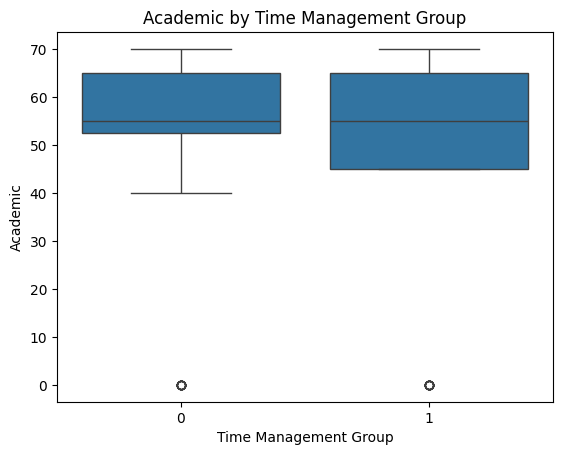

In [ ]:
sns.boxplot(x='Time Management Group', y='Academic', data=new_data)
plt.title('Academic by Time Management Group')
plt.show()

Let's check the correlation between independent groups by using independent T-test

In [ ]:
from pingouin import ttest, compute_effsize, power_ttest

t_result = ttest(new_data[new_data['Time Management Group'] == 1]['Academic'],
                new_data[new_data['Time Management Group'] == 0]['Academic'],
                alternative='greater')
print("\nT-test Results:\n", t_result)

# Effect Size and Power (if significant)
if t_result['p-val'].iloc[0] < 0.05:
  eff_size = compute_effsize(new_data[new_data['Time Management Group'] == 1]['Academic'],
                            data[new_data['Time Management Group'] == 0]['Academic'],
                            eftype='cohen')
  power = power_ttest(es=eff_size, n1=len(new_data[new_data['Time Management Group'] == 1]),
                      n2=len(data[data['Time Management Group'] == 0]), alpha=0.05, alternative='one-sided')

  print(f"Effect Size (Cohen's d): {eff_size:.3f}")
  print(f"Statistical Power: {power:.3f}")


T-test Results:
                T        dof alternative     p-val          CI95%   cohen-d  \
T-test -0.731721  88.974565     greater  0.766869  [-10.95, inf]  0.139513   

         BF10     power  
T-test  0.497  0.008149  


Judging by the result p-value, we can tell that even if a correlation exists betwee values, it is not statistically significant (p-value highter than our alpha-value of 0.05)

# Under-the-hood zone

In [ ]:
# Scatterplot of Attendance and Time Management score by entries
pyplot.scatter(new_data['Attendance'],
               new_data['Time Management Score'],
               color='green',
               marker='o')
pyplot.xlabel('Attendance')
pyplot.ylabel('Time Management Score')

In [ ]:
# Scatterplot of Academic Performance and Time Management Score by entries
pyplot.scatter(new_data['Academic'],
               new_data['Time Management Score'],
               color='green',
               marker='o')
pyplot.xlabel('Academic Performance')
pyplot.ylabel('Time Management Score')

In [ ]:
# Attendance and Academic Performance distribution comparison
fig, ax = pyplot.subplots()
ax.boxplot([new_data['Attendance'], new_data['Academic']], labels=['Attendance', 'Academic Performance'])

ax.set_title('Attendance and Academic Performance Comparison')
ax.set_ylabel('Value')

pyplot.show()